In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf

tf.__version__
!pip install tensorflow==1.15

In [ ]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM,Activation,Dense,Dropout,Input,Embedding
from keras.optimizers import RMSprop,Adam,SGD
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
import pandas as pd
df = pd.read_excel("/content/drive/My Drive/Colab Notebooks/dataset/news.xlsx",encoding='utf-8')

In [ ]:

df.head(5)

,NT,Headline,NewsId,NewsType
0,বাংলাদেশ,‘৬ মাসে ২০৮৩ নারী ও শিশু নির্যাতনের শিকার’,0,national
1,বাংলাদেশ,‘অধ্যক্ষ সিরাজকে আপত্তিকর অবস্থায় দেখা গেছে’,0,national
2,বাংলাদেশ,‘আমরণ অনশন করে ছাত্রলীগের পদ পাওয়া যাবে না’,0,national
3,বাংলাদেশ,‘ইজ্জত হারাইয়া ফিরছি টেখাটা ফিরত চাই’,0,national
4,বাংলাদেশ,‘ইনাম চৌধুরীর আ. লীগে জায়গা পাওয়া দুর্যোগের পূ...,0,national


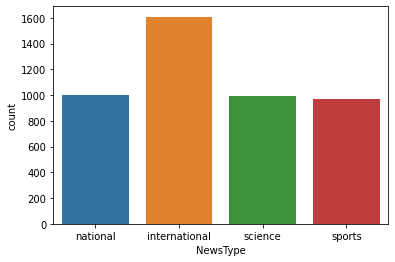

In [ ]:
import seaborn as sns

sns.countplot(x='NewsType', data=df)
#plt.savefig('/content/data.png')

In [ ]:
df.columns

Index(['NT', 'Headline', 'NewsId'], dtype='object')

In [ ]:
df.shape

(4580, 3)

In [ ]:

df = df.drop(['NT'],axis=1)
df.head(2)


,Headline,NewsId,NewsType
0,‘৬ মাসে ২০৮৩ নারী ও শিশু নির্যাতনের শিকার’,0,national
1,‘অধ্যক্ষ সিরাজকে আপত্তিকর অবস্থায় দেখা গেছে’,0,national


In [ ]:
import string 
def remove_punc(s):
    table = str.maketrans({key: None for key in string.punctuation})
    return s.translate(table)
x = df['Headline'].apply(remove_punc)
x.shape

(4580,)

In [ ]:
from keras.utils import to_categorical
y=to_categorical(df['NewsId'])
y.shape


(4580, 4)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=2222)

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
x_test.shape

(916,)

In [ ]:
max_words = 4000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(x_train)
sequences = tok.texts_to_sequences(x_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
def RNN():
  inputs = Input(shape=[max_len,])
  layer = Embedding(max_words,150,input_length=max_len,)(inputs)
  layer = Activation('relu')(layer)
  layer = Dropout(.3)(layer)
  layer = LSTM(128)(layer)
  layer = Dense(128,activation='relu')(layer)
  layer = Dropout(.3)(layer)
  layer = Dense(4,activation='softmax')(layer)
  
  model = Model(inputs=inputs,outputs=layer)
  return model

In [ ]:
model = RNN()
#model.summary()
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=.0001),metrics=['acc'])

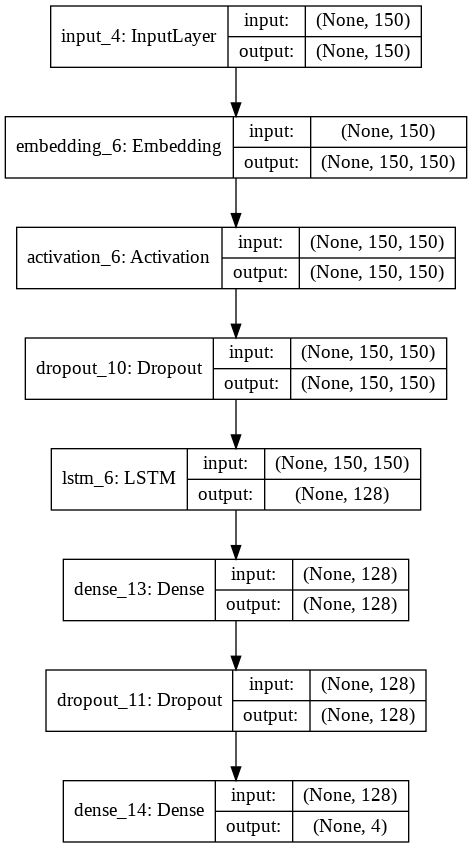

In [ ]:
from keras.utils import plot_model
plot_model(model,show_shapes=True,to_file='model.png')

In [ ]:
history = model.fit(sequences_matrix, y_train, epochs=100, batch_size=128,validation_split=.2,
                    callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])


Train on 2931 samples, validate on 733 samples
Epoch 1/100
2931/2931 [==============================] - 5s 2ms/step - loss: 1.3838 - acc: 0.3129 - val_loss: 1.3782 - val_acc: 0.3615
Epoch 2/100
2931/2931 [==============================] - 3s 1ms/step - loss: 1.3746 - acc: 0.3402 - val_loss: 1.3657 - val_acc: 0.3615
Epoch 3/100
2931/2931 [==============================] - 3s 1ms/step - loss: 1.3650 - acc: 0.3402 - val_loss: 1.3561 - val_acc: 0.3615
Epoch 4/100
2931/2931 [==============================] - 3s 1ms/step - loss: 1.3635 - acc: 0.3402 - val_loss: 1.3549 - val_acc: 0.3615
Epoch 5/100
2931/2931 [==============================] - 3s 1ms/step - loss: 1.3626 - acc: 0.3402 - val_loss: 1.3533 - val_acc: 0.3615
Epoch 6/100
2931/2931 [==============================] - 3s 1ms/step - loss: 1.3595 - acc: 0.3402 - val_loss: 1.3515 - val_acc: 0.3615
Epoch 7/100
2931/2931 [==============================] - 3s 1ms/step - loss: 1.3552 - acc: 0.3402 - val_loss: 1.3486 - val_acc: 0.3615
Epoch 8

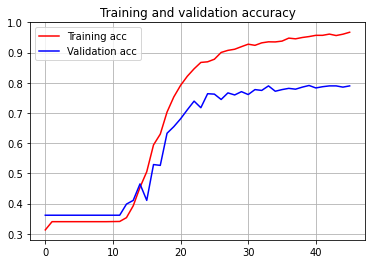

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot( acc, 'r', label='Training acc')
plt.plot( val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.grid()
plt.legend()
#plt.savefig('/content/accuracy.png')


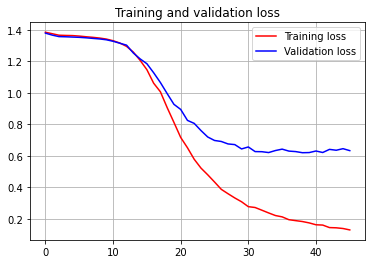

In [ ]:
plt.plot(loss, 'r', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.grid()
plt.legend()
#plt.savefig('/content/loss.png')

In [ ]:
test_sequences = tok.texts_to_sequences(x_test)

test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

accr = model.evaluate(test_sequences_matrix,y_test)
print("Test set loss :{:0.3f}\n accuracy : {:0.3f}".format(accr[0],accr[1]))

916/916 [==============================] - 1s 2ms/step
Test set loss :0.707
 accuracy : 0.739


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

predicted=model.predict(test_sequences_matrix)
print(confusion_matrix(y_test.argmax(axis=1), predicted.argmax(axis=1)))
print(classification_report(y_test,predicted>.55))

[[139  32  18  16]
 [ 35 248  38  26]
 [ 13  22 143  11]
 [  6  16   6 147]]
              precision    recall  f1-score   support

           0       0.78      0.59      0.67       205
           1       0.81      0.67      0.74       347
           2       0.81      0.65      0.72       189
           3       0.77      0.75      0.76       175

   micro avg       0.80      0.66      0.72       916
   macro avg       0.79      0.66      0.72       916
weighted avg       0.80      0.66      0.72       916
 samples avg       0.66      0.66      0.66       916



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


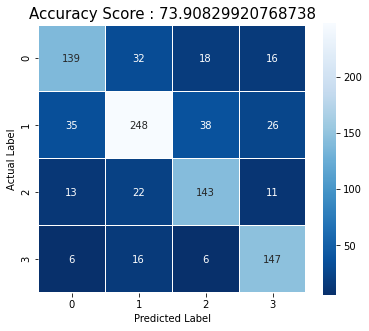

In [ ]:
cm = confusion_matrix(y_test.argmax(axis=1), predicted.argmax(axis=1))
plt.figure(figsize=(6,5))
sns.heatmap(cm,annot=True,fmt='',linewidth=.15,square=True,cmap='Blues_r');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
#plt.savefig('/content/matrix.png')
all_sample_title = 'Accuracy Score : {0}'.format(accr[1]*100)
plt.title(all_sample_title,size=15);

In [ ]:
tes = ['লিভারপুলের মতো ভুল করবে না সিটি',
       'করোনা মোকাবিলায় যে কৌশলে এগিয়ে দরিদ্র এই দেশগুলো',
       'করোনাবশের চেষ্টায় জাপানের গবেষকেরা',
       'তথ্যপ্রযুক্তি খাতে বড় বিপর্যয়ের আশঙ্কা',
       'ভিডিও কনফারেন্সের সুবিধা নিয়ে এল']
t = tok.texts_to_sequences(tes)
t = sequence.pad_sequences(t,maxlen=max_len)
preds = model.predict(t)
print(preds)

[[0.03009813 0.01374252 0.01859769 0.9375617 ]
 [0.03804704 0.32385266 0.17213295 0.46596736]
 [0.1013849  0.21854334 0.37692624 0.30314553]
 [0.03751253 0.07253236 0.86947304 0.02048217]
 [0.04045986 0.0941885  0.81155163 0.0538    ]]
